# *Machine Learning Project - Car Pricing*

## ***1. Loading and Preprocessing***

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Load Dataset
df = pd.read_csv(r"C:\Users\HP\Downloads\Machine Learning\Project\CarPrice_Assignment.csv")
display(df.head())
print(df.info())
print(df.describe())

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [177]:
# Data Preprocessing
# Handling missing values
df.dropna(inplace=True)  

# Encoding categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns

if len(categorical_cols) > 0:
    ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
    categorical_encoded = pd.DataFrame(ohe.fit_transform(df[categorical_cols]), 
                                       columns=ohe.get_feature_names_out(categorical_cols),
                                       index=df.index)

    df = df.drop(columns=categorical_cols).reset_index(drop=True)
    df = pd.concat([df, categorical_encoded], axis=1)

# Spliting dataset into training and testing sets
X = df.drop(columns=['price'])  
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## ***2. Model Implementation***

In [179]:
# Step 2: Model Implementation
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR()
}


## ***3. Model Evaluation***

In [181]:
# Step 3: Model Evaluation
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "R² Score": r2_score(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred)
    }

eval_df = pd.DataFrame(results).T
print(eval_df)



                             R² Score          MAE           MSE
Linear Regression           -1.237488  7645.316908  1.766363e+08
Decision Tree Regressor      0.866580  2098.308951  1.053268e+07
Random Forest Regressor      0.953739  1378.892512  3.652007e+06
Gradient Boosting Regressor  0.931561  1685.616428  5.402849e+06
Support Vector Regressor    -0.101717  5705.060992  8.697400e+07


In [182]:
# Identifying the best-performing model
best_model = eval_df.sort_values(by="R² Score", ascending=False).index[0]
print(f"Best performing model: {best_model}")


Best performing model: Random Forest Regressor


In [183]:
# Justification for best model
print(f"The best model is {best_model} because it has the highest R² Score, meaning it explains the most variance in car prices. Additionally, it has the lowest Mean Absolute Error (MAE) and Mean Squared Error (MSE), indicating that its predictions are more accurate and have fewer large deviations compared to other models.")

The best model is Random Forest Regressor because it has the highest R² Score, meaning it explains the most variance in car prices. Additionally, it has the lowest Mean Absolute Error (MAE) and Mean Squared Error (MSE), indicating that its predictions are more accurate and have fewer large deviations compared to other models.


## ***4. Feature Importance Analysis***

Top 10 Significant Features Affecting Car Prices:
       Feature  Importance
7   enginesize    0.549018
6   curbweight    0.293698
14  highwaympg    0.041858
11  horsepower    0.028179
0       car_ID    0.019694
4     carwidth    0.011678
2    wheelbase    0.006137
3    carlength    0.005977
12     peakrpm    0.004968
13     citympg    0.004326


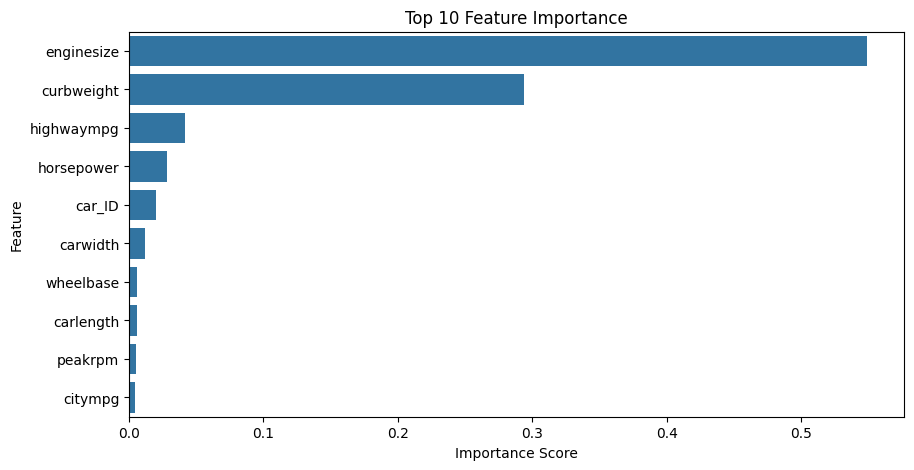

In [185]:
# Step 4: Feature Importance Analysis
if best_model in ["Random Forest Regressor", "Gradient Boosting Regressor"]:
    model = models[best_model]
    importance = model.feature_importances_
    feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
    
    # Selecting top 10 features for better visualization
    top_features = feature_importance.head(10)
    
    
    print("Top 10 Significant Features Affecting Car Prices:")
    print(top_features)
    
    # To Feature importance
    plt.figure(figsize=(10, 5))
    sns.barplot(x=top_features['Importance'], y=top_features['Feature'])
    plt.title("Top 10 Feature Importance")
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.show()

## ***5. Hyperparameter Tuning***

In [187]:
# Step 5: Hyperparameter Tuning
param_grid = {
    "Random Forest Regressor": {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20]},
    "Gradient Boosting Regressor": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2]},
    "Support Vector Regressor": {"C": [0.1, 1, 10], "kernel": ['linear', 'rbf']}
}

if best_model in param_grid:
    grid_search = GridSearchCV(models[best_model], param_grid[best_model], cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print(f"Best parameters for {best_model}: {grid_search.best_params_}")
    best_model_tuned = grid_search.best_estimator_
    
    # Evaluating tuned model
    y_pred_tuned = best_model_tuned.predict(X_test)
    print("Performance after Hyperparameter Tuning:")
    print(f"R² Score: {r2_score(y_test, y_pred_tuned):.4f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred_tuned):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_tuned)):.4f}")

Best parameters for Random Forest Regressor: {'max_depth': 10, 'n_estimators': 100}
Performance after Hyperparameter Tuning:
R² Score: 0.9528
MAE: 1380.4867
RMSE: 1929.3937
